I work on a dataset that can be found on the following link:

https://www.kaggle.com/datasets/ahsan81/used-handheld-device-data?resource=download

This dataset contains the different attributes of used/refurbished phones and tablets.

I start importing the first libraries that will help me to work on the data

In [1]:
import pandas as pd
import numpy as np

I upload the dataset as a dataframe

In [2]:
used_device_df = pd.read_csv('used_device_data.csv')

# Data exploration and data wrangling

## Explore the dataset

I print a summary of the database

In [3]:
used_device_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

The values are of three types: object, float64 and int64.

Six variables have some null values.

In [4]:
len(used_device_df.index)

3454

There are 3454 samples which means that this is the number of the smartphones registered.


In [5]:
len(used_device_df.columns)

15

There are 15 variables:
- **device_brand** is the name of manufacturing brand;
- **os** is the operating system on which the device runs;
- **screen_size** is the size of the screen in cm;
- **4g** is a string declaring whether 4G is available or not;
- **5g** is a string declaring whether 5G is available or not;
- **rear_camera_mp** is the resolution of the rear camera in megapixels;
- **front_camera_mp** is the resolution of the front camera in megapixels;
- **internal_memory** is the amount of internal memory (ROM) in GB;
- **ram** is the amount of RAM in GB;
- **battery** is the energy capacity of the device battery in mAh;
- **weight** is the weight of the device in grams;
- **release_year** is the year when the device model was released;
- **days_used** is the number of days the used/refurbished device has been used;
- **normalized_new_price** is the normalized price of a new device of the same model;
- **normalized_used_price** is the normalized price of the used/refurbished device.

In [6]:
used_device_df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
rear_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
front_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
internal_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


I get some descriptive statistics.

The first interesting thing that can be inferred from these values is the fact that the devices have been released between 2013 and 2020 and they are used for a maximum of three years.

Another interesting fact is that the prices surprisely appear strange, because they have been normalized. There are usually two reasons to do this choice:

1. The general range of prices changes over time
2. The price of a smartphone depends also on where you buy it

In [7]:
used_device_df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [8]:
used_device_df.tail()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


I get the first 5 rows and the last 5 rows and it may seem like we are only working with android devices, I check that we are not

In [9]:
used_device_df['os'].unique()

array(['Android', 'Others', 'iOS', 'Windows'], dtype=object)

I proved that we are also working with also other operative systems

## Clean up the dataset

I found out that in the columns 'rear_camera_mp', 'front_camera_mp', 'internal_memory', 'ram', 'battery' and 'weight' there are some null values, this is how I operated:
1. For 'rear_camera_mp' and 'front_camera_mp', I decided to replace the empty cells with zero, because I suppose that the reason why these values are missing is because the camera is not present. #may be broken
2. For 'internal_memory', 'ram', 'battery' and 'weight', I decided to replace the empty cells with the mean of that column, because all these features are always present in smartphones and tablets, so I prefer to keep the rows.

In [10]:
used_device_df['rear_camera_mp'].fillna(value = 0, inplace=True)
used_device_df['front_camera_mp'].fillna(value = 0, inplace=True)
used_device_df['internal_memory'].fillna(used_device_df['internal_memory'].mean(), inplace=True)
used_device_df['ram'].fillna(used_device_df['ram'].mean(), inplace=True)
used_device_df['battery'].fillna(used_device_df['battery'].mean(), inplace=True)
used_device_df['weight'].fillna(used_device_df['weight'].mean(), inplace=True)

In [11]:
used_device_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3454 non-null   float64
 6   front_camera_mp        3454 non-null   float64
 7   internal_memory        3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Now we have no null values in the dataset.

I decide to give a look at the internal memory of the smartphones to check if they are coherent with the reality.

In [12]:
im = used_device_df['internal_memory'].value_counts()
im

16.000000      1283
32.000000      1083
64.000000       509
128.000000      372
256.000000       86
512.000000       44
0.060000         18
0.100000         17
8.000000         12
4.000000         10
1024.000000       8
0.500000          4
54.573099         4
0.200000          2
24.000000         1
0.010000          1
Name: internal_memory, dtype: int64

Usually the amount of the internal memory of a device in GB is a power of 2, but as we can see, except for $[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]$, we find some particular values. I decide to create a mask to see the other features of these devices 

In [15]:

vector = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
applied_mask_df = used_device_df
for i in range(0,len(vector)):
    particular_memory_mask = applied_mask_df['internal_memory'] != vector[i]
    applied_mask_df = applied_mask_df[particular_memory_mask]


"\nparticular_memory_mask = used_device_df['internal_memory'] >1023\napplied_mask_df = used_device_df[particular_memory_mask]\napplied_mask_df.head(20)\n\nvector = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]\nparticular_memory_mask = used_device_df['internal_memory'] not in vector\napplied_mask_df = used_device_df[particular_memory_mask]\n"

In [20]:
applied_mask_df

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
103,Micromax,Android,10.16,no,no,2.00,0.3,0.500000,0.250000,1500.000000,146.5,2014,1016,3.043570,3.926715
104,Micromax,Android,7.75,no,no,0.30,0.3,0.500000,0.250000,1500.000000,89.0,2014,956,2.386926,3.664843
105,Micromax,Android,10.03,no,no,2.00,0.3,0.200000,0.250000,2000.000000,85.0,2013,680,2.856470,4.244631
113,Nokia,Others,5.18,no,no,0.30,0.0,0.100000,0.030000,1020.000000,90.5,2020,272,2.910174,3.399863
114,Nokia,Others,5.18,no,no,0.30,0.0,0.060000,4.036122,1020.000000,91.3,2020,288,2.729159,2.911263
116,Nokia,Others,5.18,no,no,0.30,0.0,0.060000,0.020000,1200.000000,88.2,2020,266,3.370738,3.699077
117,Nokia,Others,5.18,yes,no,0.30,0.0,54.573099,0.020000,1200.000000,86.5,2019,234,2.721295,3.688379
322,Micromax,Android,10.16,no,no,2.00,0.3,0.500000,0.250000,1500.000000,146.5,2014,900,3.118834,3.891820
323,Micromax,Android,7.75,no,no,0.30,0.3,0.500000,0.250000,1500.000000,89.0,2014,757,1.572774,3.686126
324,Micromax,Android,10.03,no,no,2.00,0.3,0.200000,0.250000,2000.000000,85.0,2013,652,3.404857,4.268998


The data seem very strage, also comparing them with the RAM capacity. Checking more carefully, many of these devices seem not to have a front camera. These three combined features made me immediately think about the so-called "dumb-phones", in fact some devices with these extremely particular caracteristics can be found online. I decide not to remove these rows, because even if they are outliers (and this will be expecially clear with the following graphs), they may be relevant for some analysis.

## Show some interesting plots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

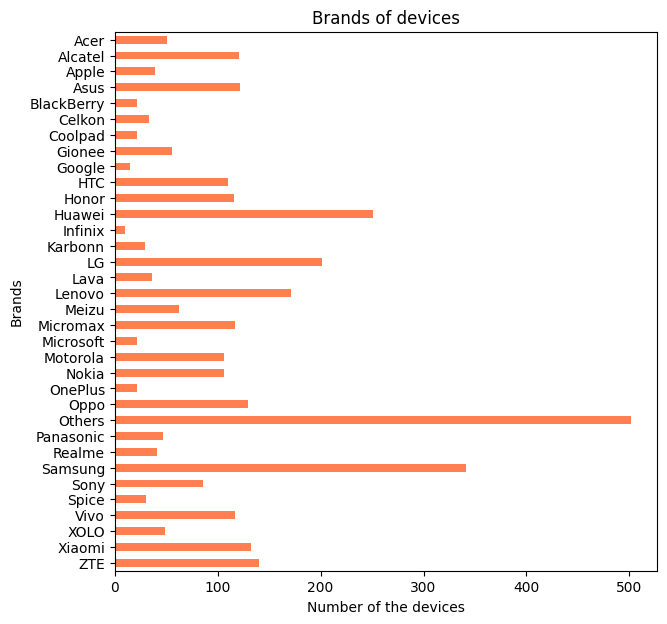

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Brands of devices')
used_device_df['device_brand'].value_counts().sort_index(ascending = False).plot(kind='barh', color = "coral")
plt.xlabel('Number of the devices')
plt.ylabel('Brands')
plt.show()

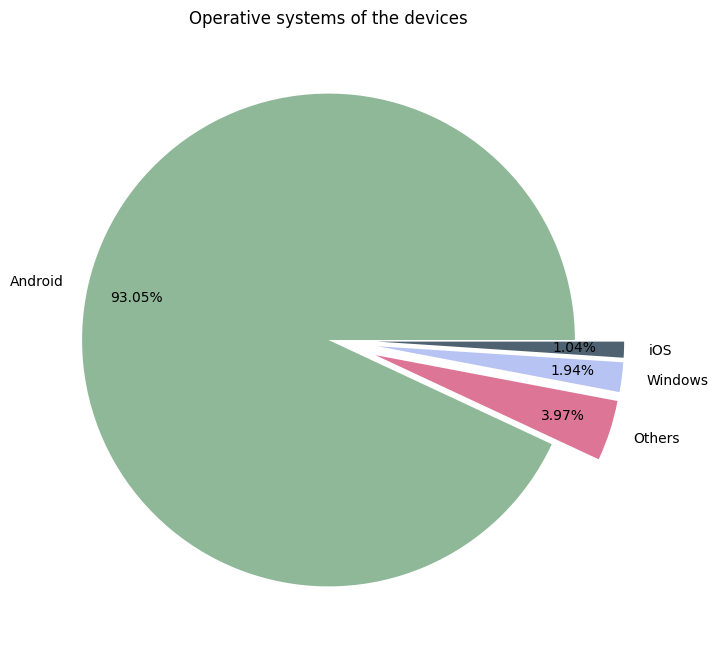

In [ ]:
plt.figure(figsize=(8,8))
values = used_device_df['os'].value_counts()
labels = ['Android', 'Others', 'Windows', 'iOS']
colors = ['#8EB897','#DD7596', '#B7C3F3', '#4F6272']
explode = (0, .2, .2, .2)
plt.pie(values, labels = labels, colors = colors, autopct = '%.2f%%', explode = explode, pctdistance= 0.8)
plt.title('Operative systems of the devices')
plt.show()

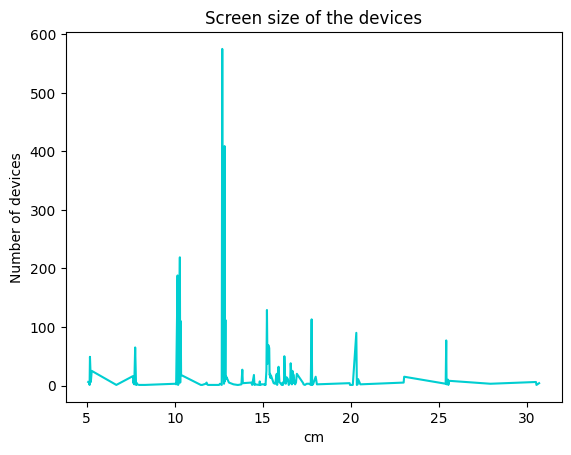

In [ ]:
plt.figure()
used_device_df['screen_size'].value_counts().sort_index().plot(color = "darkturquoise")
plt.title('Screen size of the devices')
plt.xlabel('cm')
plt.ylabel('Number of devices')
plt.show()


#x ax should be fixed

To prepare the dataset to show some interesting plots

In [ ]:
#used_device_df["4g"] = used_device_df["4g"].replace({"yes": 1, "no": 0})
#used_device_df["5g"] = used_device_df["5g"].replace({"yes": 1, "no": 0})

NameError: name 'ax0' is not defined

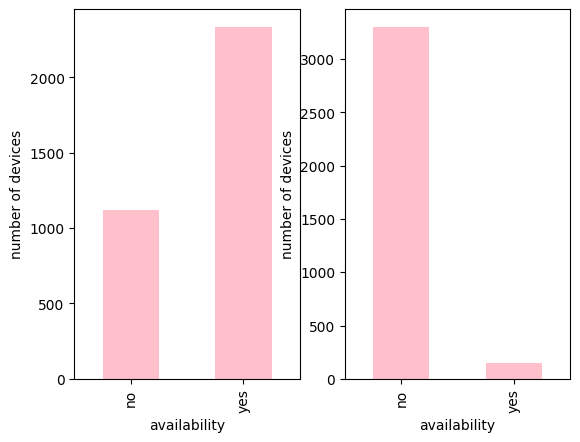

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.setp(axes, xlabel = "availability", ylabel= "number of devices")
used_device_df['4g'].value_counts().sort_index().plot(kind='bar', color = "pink", ax = axes[0])
used_device_df['5g'].value_counts().sort_index().plot(kind='bar', color = "pink", ax = axes[1])
ax0.title.set_text('4G connection')
ax1.title.set_text('5G connection')
fig.tight_layout() 
plt.show()


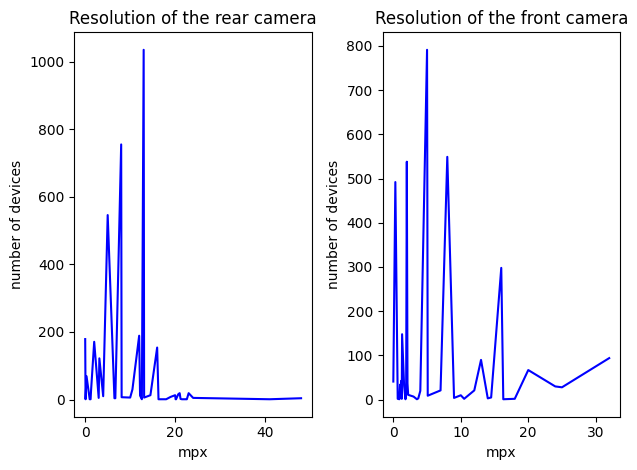

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.setp(axes, xlabel = "mpx", ylabel= "number of devices")
ax0 = used_device_df['rear_camera_mp'].value_counts().sort_index().plot(color = "blue", ax = axes[0])
ax1 = used_device_df['front_camera_mp'].value_counts().sort_index().plot(color = "blue", ax = axes[1])
ax0.title.set_text('Resolution of the rear camera')
ax1.title.set_text('Resolution of the front camera')
fig.tight_layout() 
plt.show()

#x axes should be fixed


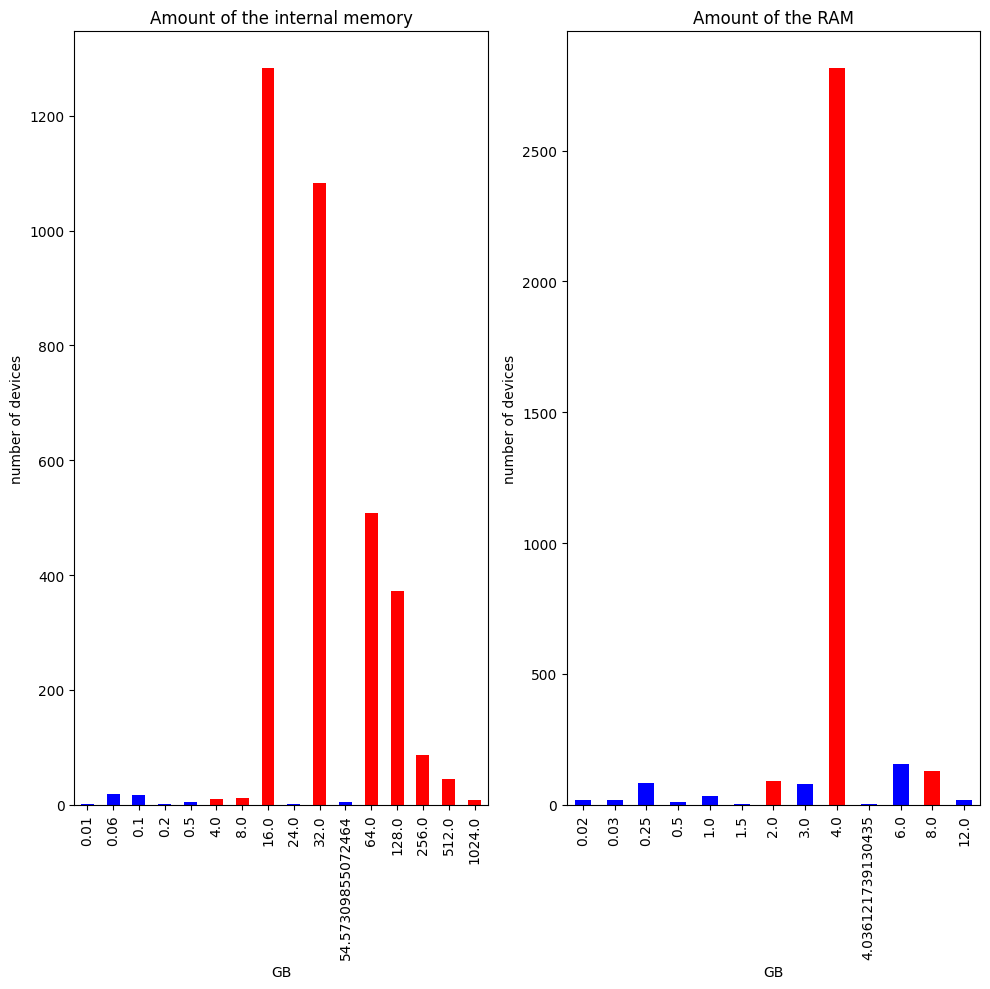

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
plt.setp(axes, xlabel = "GB", ylabel= "number of devices")
my_colors = ['b','b','b','b','b','r','r','r','b','r','b','r','r','r','r','r']
my_colors2 = ['b','b','b','b','b','b','r','b','r','b','b','r','b']
ax0 = used_device_df['internal_memory'].value_counts().sort_index().plot(kind='bar', ax = axes[0], color = my_colors)
ax1 = used_device_df['ram'].value_counts().sort_index().plot(kind='bar', ax = axes[1], color = my_colors2)
ax0.title.set_text('Amount of the internal memory')
ax1.title.set_text('Amount of the RAM')
fig.tight_layout() 
plt.show()

#x axes should be fixed

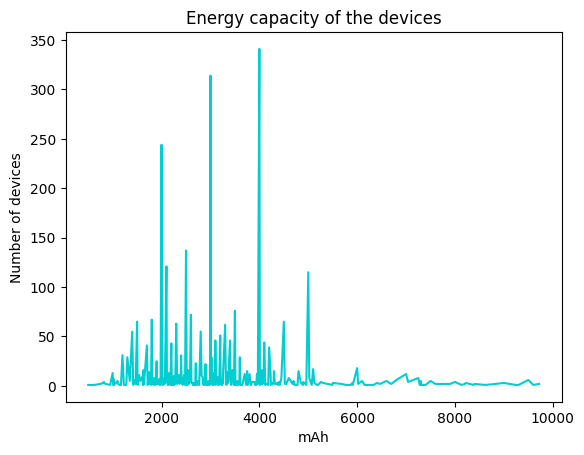

In [ ]:
plt.figure()
used_device_df['battery'].value_counts().sort_index().plot(color = "darkturquoise")
plt.title('Energy capacity of the devices')
plt.xlabel('mAh')
plt.ylabel('Number of devices')
plt.show()

Pitches in 2k 3k 4k 5k...

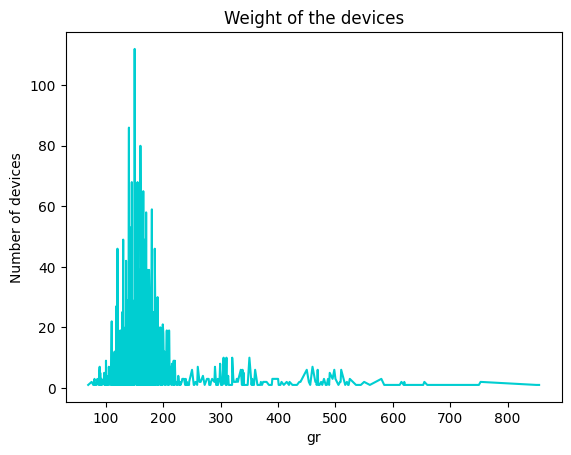

In [ ]:
plt.figure()
used_device_df['weight'].value_counts().sort_index().plot(color = "darkturquoise")
plt.title('Weight of the devices')
plt.xlabel('gr')
plt.ylabel('Number of devices')
plt.show()

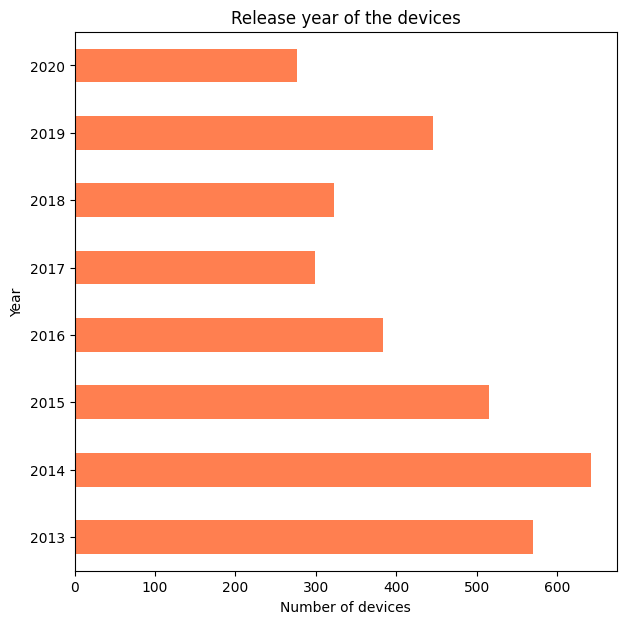

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Release year of the devices')
used_device_df['release_year'].value_counts().sort_index().plot(kind='barh', color = "coral")
plt.xlabel('Number of devices')
plt.ylabel('Year')
plt.show()

Pandemic, not many releases

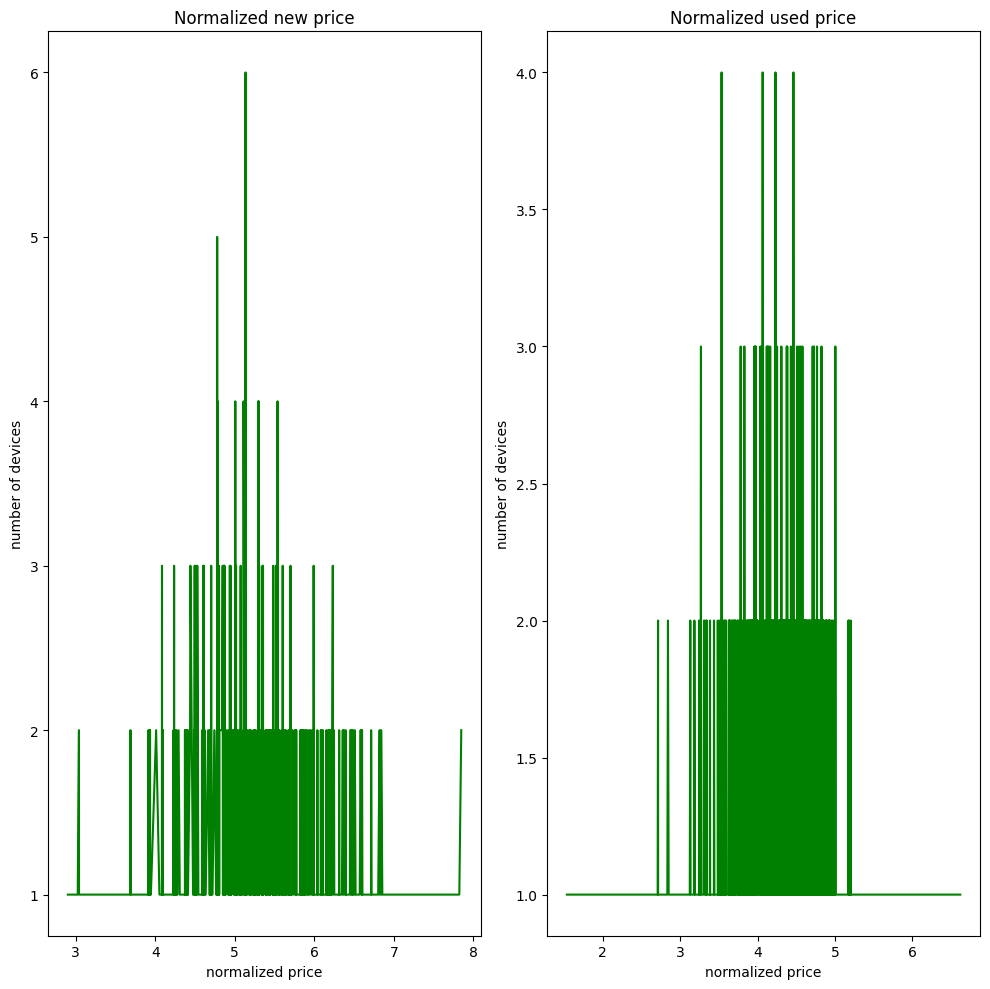

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
plt.setp(axes, xlabel = "normalized price", ylabel= "number of devices")
ax0 = used_device_df['normalized_new_price'].value_counts().sort_index().plot(ax = axes[0], color = 'g')
ax1 = used_device_df['normalized_used_price'].value_counts().sort_index().plot(ax = axes[1], color = 'g')
ax0.title.set_text('Normalized new price')
ax1.title.set_text('Normalized used price')
fig.tight_layout() 
plt.show()

price can not be appreciated, to volatile?

C:\Users\Annali\AppData\Local\Temp\ipykernel_19548\3995564759.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(used_device_df.corr(), annot = True) #usually used to show the correlation between variables


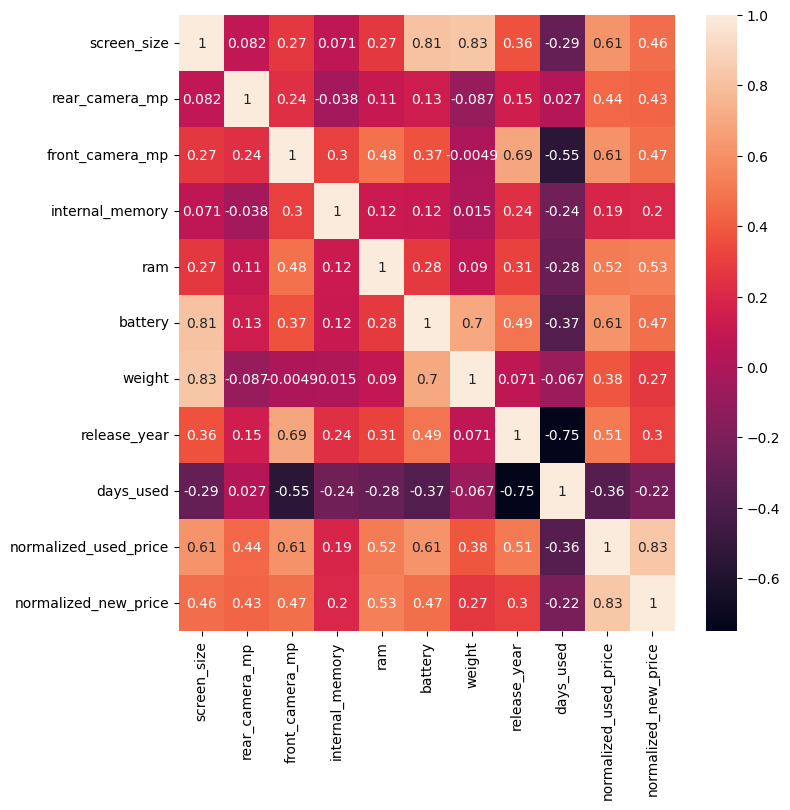

In [ ]:
plt.figure(figsize = (8, 8))
sns.heatmap(used_device_df.corr(), annot = True)
plt.show()